In [1]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

import cv2
import os
import PIL 

import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report

In [2]:
tf.config.experimental.list_logical_devices()

[LogicalDevice(name='/device:CPU:0', device_type='CPU'),
 LogicalDevice(name='/device:GPU:0', device_type='GPU')]

In [3]:
url = "http://download.tensorflow.org/example_images/flower_photos.tgz" 
data_dir = tf.keras.utils.get_file('flower_photos', origin=url, cache_dir='.', untar=True)

In [4]:
import pathlib
data_dir = pathlib.Path(data_dir)
data_dir

WindowsPath('datasets/flower_photos')

In [5]:
image_count = len(list(data_dir.glob('*/*.jpg')))
image_count

3670

In [6]:
roses = list(data_dir.glob('roses/*'))
tulips = list(data_dir.glob('tulips/*'))
roses[:5]

[WindowsPath('datasets/flower_photos/roses/10090824183_d02c613f10_m.jpg'),
 WindowsPath('datasets/flower_photos/roses/102501987_3cdb8e5394_n.jpg'),
 WindowsPath('datasets/flower_photos/roses/10503217854_e66a804309.jpg'),
 WindowsPath('datasets/flower_photos/roses/10894627425_ec76bbc757_n.jpg'),
 WindowsPath('datasets/flower_photos/roses/110472418_87b6a3aa98_m.jpg')]

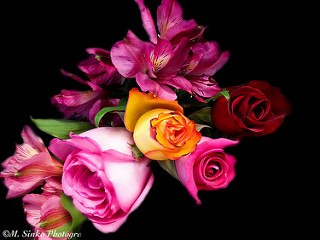

In [7]:
PIL.Image.open(roses[6])

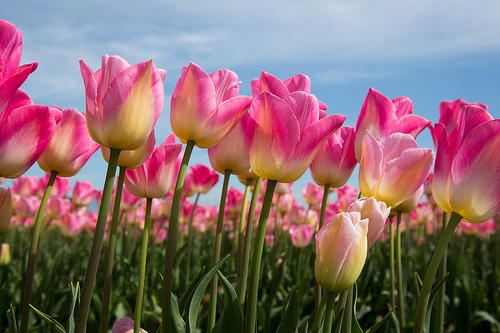

In [8]:
PIL.Image.open(tulips[3])

In [7]:
flowers_image_dict = {
    'roses' : list(data_dir.glob('roses/*')),
    'tulips' : list(data_dir.glob('tulips/*')),
    'dandelion' : list(data_dir.glob('dandelion/*')),
    'sunflowers' : list(data_dir.glob('sunflowers/*')),
    'daisy' : list(data_dir.glob('daisy/*')),
}

In [8]:
flowers_image_dict['roses'][:5]

[WindowsPath('datasets/flower_photos/roses/10090824183_d02c613f10_m.jpg'),
 WindowsPath('datasets/flower_photos/roses/102501987_3cdb8e5394_n.jpg'),
 WindowsPath('datasets/flower_photos/roses/10503217854_e66a804309.jpg'),
 WindowsPath('datasets/flower_photos/roses/10894627425_ec76bbc757_n.jpg'),
 WindowsPath('datasets/flower_photos/roses/110472418_87b6a3aa98_m.jpg')]

In [9]:
flowers_labels_dict = {
    'roses':0,
    'daisy':1,
    'dandelion':2,
    'sunflowers':3,
    'tulips':4
}

In [ ]:
# Using CV2 module to read this image file into openCV object (convering image into 3D numpy array)
img = cv2.imread(str(flowers_image_dict['roses'][0]))
img.shape

In [ ]:
cv2.resize(img,(180,180)).shape

In [10]:
# Creating the dataset X contains flower images (3D numpy array) and y contains flower name (flower number)
X, y = [], []
for flower_name, images in flowers_image_dict.items():
    for image in images:
        img = cv2.imread(str(image))
        resized_image = cv2.resize(img,(180,180))
        X.append(resized_image)
        y.append(flowers_labels_dict[flower_name])


In [11]:
# Converting list into numpy array
X = np.array(X)
y = np.array(y)

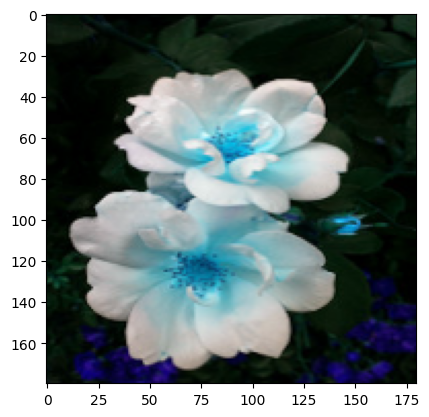

In [13]:
plt.imshow(X[0])

In [12]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

In [ ]:
print(len(X_train))
print(len(X_test))

In [13]:
X_train_scaled = X_train/255
X_test_scaled = X_test/255

In [ ]:
print(X_train_scaled.shape)
f"input layer size = {180*180*3}"

In [16]:
model = tf.keras.Sequential([
    #CNN
    layers.Conv2D(16, 3, padding='same', activation='relu'), #filters=16, filter_size = kernel_size=(3,3), input_shape=(180,180,3) (automatic)
    layers.MaxPool2D(), # Default size = (2,2)

    layers.Conv2D(32, 3, padding='same', activation='relu'),
    layers.MaxPool2D(),

    layers.Conv2D(64, 3, padding='same', activation='relu'),
    layers.MaxPool2D(),

    # Dense Network
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(5, activation="softmax")

])

model.compile(optimizer='adam',
             loss='sparse_categorical_crossentropy',
              metrics=['accuracy']
             )

In [17]:
model.fit(X_train_scaled, y_train, epochs=5)

Epoch 1/5
86/86 [==============================] - 26s 70ms/step - loss: 1.4257 - accuracy: 0.4248
Epoch 2/5
86/86 [==============================] - 6s 67ms/step - loss: 1.0676 - accuracy: 0.5730
Epoch 3/5
86/86 [==============================] - 4s 52ms/step - loss: 0.8879 - accuracy: 0.6613
Epoch 4/5
86/86 [==============================] - 4s 51ms/step - loss: 0.7099 - accuracy: 0.7398
Epoch 5/5
86/86 [==============================] - 4s 50ms/step - loss: 0.5148 - accuracy: 0.8110


In [18]:
model.evaluate(X_test_scaled, y_test)

29/29 [==============================] - 1s 35ms/step - loss: 1.0421 - accuracy: 0.6634


[1.0421209335327148, 0.6633986830711365]

In [29]:
y_pred = model.predict(X_test_scaled)
y_pred = [np.argmax(i) for i in y_pred]
y_pred[:5]

29/29 [==============================] - 1s 18ms/step


[3, 0, 2, 1, 2]

In [30]:
y_test[:5]

array([4, 0, 2, 1, 2])

In [15]:
# Data Augmentation
data_augmentation = keras.Sequential([
    layers.experimental.preprocessing.RandomFlip('horizontal',
                                                 input_shape=(180,180,3)),
    layers.experimental.preprocessing.RandomZoom(0.1),
    layers.experimental.preprocessing.RandomRotation(0.1)
])
tf.get_logger().setLevel('ERROR')

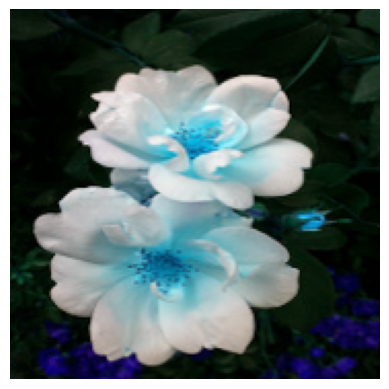

In [37]:
plt.axis('off')
plt.imshow(X[0])

In [43]:
plt.axis('off')
plt.imshow(data_augmentation(X)[0].numpy().astype("uint8"))

In [16]:
model_da = tf.keras.Sequential([
    # Data Augmentation
    data_augmentation,
    
    #CNN
    layers.Conv2D(16, 3, padding='same', activation='relu'), #filters=16, filter_size = kernel_size=(3,3), input_shape=(180,180,3) (automatic)
    layers.MaxPool2D(), # Default size = (2,2)

    layers.Conv2D(32, 3, padding='same', activation='relu'),
    layers.MaxPool2D(),

    layers.Conv2D(64, 3, padding='same', activation='relu'),
    layers.MaxPool2D(),

    # Dense Network
    layers.Dropout(0.2),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(5, activation="softmax")

])

model_da.compile(optimizer='adam',
             loss='sparse_categorical_crossentropy',
              metrics=['accuracy']
             )

In [17]:
model_da.fit(X_train_scaled, y_train, epochs=5)

Epoch 1/5
86/86 [==============================] - 26s 226ms/step - loss: 1.4045 - accuracy: 0.3990
Epoch 2/5
86/86 [==============================] - 20s 234ms/step - loss: 1.0660 - accuracy: 0.5647
Epoch 3/5
86/86 [==============================] - 19s 226ms/step - loss: 0.9304 - accuracy: 0.6424
Epoch 4/5
86/86 [==============================] - 19s 222ms/step - loss: 0.8671 - accuracy: 0.6722
Epoch 5/5
86/86 [==============================] - 19s 222ms/step - loss: 0.8162 - accuracy: 0.6831


In [18]:
model_da.evaluate(X_test_scaled, y_test)

29/29 [==============================] - 1s 34ms/step - loss: 0.8593 - accuracy: 0.6863


[0.8593083620071411, 0.686274528503418]

In [21]:
y_pred_da = model_da.predict(X_test_scaled)
y_pred_da = [np.argmax(i) for i in y_pred_da]
y_pred_da[:5]

29/29 [==============================] - 1s 22ms/step


[3, 0, 2, 1, 2]

In [19]:
y_test[:5]

array([4, 0, 2, 1, 2])